# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting C:\Users\Mikkel Groengaard/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Mikkel Groengaard/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting C:\Users\Mikkel Groengaard/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Mikkel Groengaard/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting C:\Users\Mikkel Groengaard/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Mikkel Groengaard/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting C:\Users\Mikkel Groengaard/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Mikkel Groengaard/.pytorch/F_MNIST_data/FashionMNIST\raw



Here we can see one of the images.

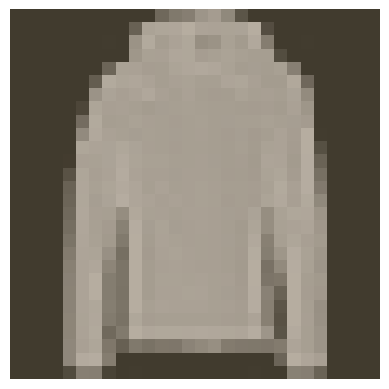

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [15]:
import torch
import torch.nn as nn

class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        #x = self.relu(self.fc2(x))
        #x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

# Create an instance of the network
model = FashionMNISTNet()


In [32]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv_layer = nn.Sequential(
            # Conv Layer block 1: input size 28x28
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1), # Output size: 28x28
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # Output size: 14x14

            # Conv Layer block 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), # Output size: 14x14
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) # Output size: 7x7
            )

        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10),
            nn.Softmax(dim=1) # 10 output classes
        )

    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)

        # flatten
        x = x.view(x.size(0), -1)

        # fc layer
        x = self.fc_layer(x)


        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [34]:
from torch import optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize the network and optimizer
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the model
def train(model, trainloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            output = model(images)
            loss = criterion(output, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

# Function to test the model
def test(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on test images: {100 * correct / total}%')

In [35]:
# Train the model
train(model, trainloader, criterion, optimizer, epochs=5)

# Test the model
test(model, testloader)

Epoch 1, Loss: 1.6737628893049032
Epoch 2, Loss: 1.5996918711326777
Epoch 3, Loss: 1.5812564964995963
Epoch 4, Loss: 1.5683761355973511
Epoch 5, Loss: 1.560007961955406
Accuracy of the network on test images: 88.93%


In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
#img = images[0]
#img to decice
#img = img.to('cuda')
images, labels = images.to('cuda'), labels.to('cuda')


# TODO: Calculate the class probabilities (softmax) for img
# Turn off gradients to speed up this part
with torch.no_grad():
    ps = model(images)
    print(ps[0])
    print(np.sum(ps[0].cpu().numpy()))
assert np.isclose(np.sum(ps[0].cpu().numpy()),1), "Probabilities do not sum to 1.0"
#ps = 

# Plot the image and probabilities
#helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

tensor([1.9269e-08, 6.4150e-13, 4.5987e-09, 1.0000e+00, 2.6816e-10, 5.1239e-11,
        2.6566e-09, 9.0642e-10, 3.4677e-06, 4.8425e-10], device='cuda:0')
1.0
